# IEEE Hackathon

### Data Loader

In [103]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import os
raw_data = pd.read_csv("states.timeseries.csv")

In [104]:
display(raw_data)

,date,country,state,county,fips,lat,long,locationId,actuals.cases,actuals.deaths,...,metrics.icuHeadroomRatio,metrics.icuHeadroomDetails,metrics.icuCapacityRatio,riskLevels.overall,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,actuals.newDeaths,actuals.vaccinesAdministered,riskLevels.caseDensity,cdcTransmissionLevel
0,2020-03-01,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0
1,2020-03-02,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0
2,2020-03-03,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0
3,2020-03-04,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0
4,2020-03-05,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29640,2021-09-01,US,WY,NaN,56,NaN,NaN,iso1:us#iso2:us-wy,76007.0,858.0,...,0.55,NaN,0.65,5,0.453,0.387,0.0,478529.0,5,3
29641,2021-09-02,US,WY,NaN,56,NaN,NaN,iso1:us#iso2:us-wy,76602.0,858.0,...,0.50,NaN,0.59,5,0.456,0.391,0.0,487373.0,5,3
29642,2021-09-03,US,WY,NaN,56,NaN,NaN,iso1:us#iso2:us-wy,77206.0,858.0,...,0.53,NaN,0.61,5,0.458,0.392,0.0,488883.0,5,3
29643,2021-09-04,US,WY,NaN,56,NaN,NaN,iso1:us#iso2:us-wy,NaN,858.0,...,0.53,NaN,0.61,5,0.459,0.393,0.0,490488.0,5,3


In [105]:
mobility_data1 = pd.read_csv("2020_US_Region_Mobility_Report.csv")
mobility_data2 = pd.read_csv("2021_US_Region_Mobility_Report.csv")
mobility_data = pd.concat([mobility_data1, mobility_data2])
mobility_data = mobility_data[mobility_data.sub_region_2.isnull() & mobility_data.sub_region_1.notnull()]
abbrev = us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
adjacent_states = {
    "WA": [
        "ID",
        "OR"
    ],
    "DE": [
        "MD",
        "PA",
        "NJ"
    ],
    "DC": [
        "MD",
        "VA"
    ],
    "WI": [
        "MI",
        "MN",
        "IA",
        "IL"
    ],
    "WV": [
        "OH",
        "PA",
        "MD",
        "VA",
        "KY"
    ],
    "HI": [
        
    ],
    "FL": [
        "AL",
        "GA"
    ],
    "WY": [
        "MT",
        "SD",
        "NE",
        "CO",
        "UT",
        "ID"
    ],
    "NH": [
        "VT",
        "ME",
        "MA"
    ],
    "NJ": [
        "DE",
        "PA",
        "NY"
    ],
    "NM": [
        "AZ",
        "UT",
        "CO",
        "OK",
        "TX"
    ],
    "TX": [
        "NM",
        "OK",
        "AR",
        "LA"
    ],
    "LA": [
        "TX",
        "AR",
        "MS"
    ],
    "NC": [
        "VA",
        "TN",
        "GA",
        "SC"
    ],
    "ND": [
        "MN",
        "SD",
        "MT"
    ],
    "NE": [
        "SD",
        "IA",
        "MO",
        "KS",
        "CO",
        "WY"
    ],
    "TN": [
        "KY",
        "VA",
        "NC",
        "GA",
        "AL",
        "MS",
        "AR",
        "MO"
    ],
    "NY": [
        "NJ",
        "PA",
        "VT",
        "MA",
        "CT"
    ],
    "PA": [
        "NY",
        "NJ",
        "DE",
        "MD",
        "WV",
        "OH"
    ],
    "CA": [
        "OR",
        "NV",
        "AZ"
    ],
    "NV": [
        "ID",
        "UT",
        "AZ",
        "CA",
        "OR"
    ],
    "VA": [
        "NC",
        "TN",
        "KY",
        "WV",
        "MD",
        "DC"
    ],
    "CO": [
        "WY",
        "NE",
        "KS",
        "OK",
        "NM",
        "AZ",
        "UT"
    ],
    "AK": [
        
    ],
    "AL": [
        "MS",
        "TN",
        "GA",
        "FL"
    ],
    "AR": [
        "MO",
        "TN",
        "MS",
        "LA",
        "TX",
        "OK"
    ],
    "VT": [
        "NY",
        "NH",
        "MA"
    ],
    "IL": [
        "IN",
        "KY",
        "MO",
        "IA",
        "WI"
    ],
    "GA": [
        "FL",
        "AL",
        "TN",
        "NC",
        "SC"
    ],
    "IN": [
        "MI",
        "OH",
        "KY",
        "IL"
    ],
    "IA": [
        "MN",
        "WI",
        "IL",
        "MO",
        "NE",
        "SD"
    ],
    "OK": [
        "KS",
        "MO",
        "AR",
        "TX",
        "NM",
        "CO"
    ],
    "AZ": [
        "CA",
        "NV",
        "UT",
        "CO",
        "NM"
    ],
    "ID": [
        "MT",
        "WY",
        "UT",
        "NV",
        "OR",
        "WA"
    ],
    "CT": [
        "NY",
        "MA",
        "RI"
    ],
    "ME": [
        "NH"
    ],
    "MD": [
        "VA",
        "WV",
        "PA",
        "DC",
        "DE"
    ],
    "MA": [
        "RI",
        "CT",
        "NY",
        "NH",
        "VT"
    ],
    "OH": [
        "PA",
        "WV",
        "KY",
        "IN",
        "MI"
    ],
    "UT": [
        "ID",
        "WY",
        "CO",
        "NM",
        "AZ",
        "NV"
    ],
    "MO": [
        "IA",
        "IL",
        "KY",
        "TN",
        "AR",
        "OK",
        "KS",
        "NE"
    ],
    "MN": [
        "WI",
        "IA",
        "SD",
        "ND"
    ],
    "MI": [
        "WI",
        "IN",
        "OH"
    ],
    "RI": [
        "CT",
        "MA"
    ],
    "KS": [
        "NE",
        "MO",
        "OK",
        "CO"
    ],
    "MT": [
        "ND",
        "SD",
        "WY",
        "ID"
    ],
    "MS": [
        "LA",
        "AR",
        "TN",
        "AL"
    ],
    "SC": [
        "GA",
        "NC"
    ],
    "KY": [
        "IN",
        "OH",
        "WV",
        "VA",
        "TN",
        "MO",
        "IL"
    ],
    "OR": [
        "CA",
        "NV",
        "ID",
        "WA"
    ],
    "SD": [
        "ND",
        "MN",
        "IA",
        "NE",
        "WY",
        "MT"
    ]
}
mobility_data = mobility_data.replace({"sub_region_1": abbrev})
display(mobility_data)


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
321,US,United States,AL,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-02-15,5.0,2.0,39.0,7.0,2.0,-1.0
322,US,United States,AL,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-02-16,0.0,-2.0,-7.0,3.0,-1.0,1.0
323,US,United States,AL,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-02-17,3.0,0.0,17.0,7.0,-17.0,4.0
324,US,United States,AL,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-02-18,-4.0,-3.0,-11.0,-1.0,1.0,2.0
325,US,United States,AL,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-02-19,4.0,1.0,6.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629180,US,United States,WY,NaN,NaN,US-WY,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,2021-08-27,3.0,4.0,198.0,51.0,-21.0,1.0
629181,US,United States,WY,NaN,NaN,US-WY,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,2021-08-28,4.0,3.0,229.0,50.0,-9.0,-1.0
629182,US,United States,WY,NaN,NaN,US-WY,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,2021-08-29,14.0,3.0,193.0,41.0,-6.0,-1.0
629183,US,United States,WY,NaN,NaN,US-WY,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,2021-08-30,11.0,10.0,207.0,41.0,-24.0,1.0


In [106]:
data = pd.merge(raw_data, mobility_data, left_on=['country', 'state', 'date'], right_on=['country_region_code', 'sub_region_1', 'date'], how='inner')
data = data[data['date'] > '2021-03-01']
display(data)

,date,country,state,county,fips,lat,long,locationId,actuals.cases,actuals.deaths,...,metro_area,iso_3166_2_code,census_fips_code,place_id,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
366,2021-03-02,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,58383.0,290.0,...,NaN,US-AK,NaN,ChIJG8CuwJzfAFQRNduKqSde27w,-9.0,-3.0,8.0,-26.0,-21.0,8.0
367,2021-03-03,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,58574.0,291.0,...,NaN,US-AK,NaN,ChIJG8CuwJzfAFQRNduKqSde27w,-3.0,1.0,3.0,-18.0,-21.0,8.0
368,2021-03-04,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,58722.0,291.0,...,NaN,US-AK,NaN,ChIJG8CuwJzfAFQRNduKqSde27w,-8.0,-3.0,5.0,-18.0,-23.0,8.0
369,2021-03-05,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,58870.0,292.0,...,NaN,US-AK,NaN,ChIJG8CuwJzfAFQRNduKqSde27w,-9.0,-6.0,5.0,-20.0,-25.0,9.0
370,2021-03-06,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,58870.0,292.0,...,NaN,US-AK,NaN,ChIJG8CuwJzfAFQRNduKqSde27w,-7.0,-1.0,22.0,-12.0,-13.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28116,2021-08-27,US,WY,NaN,56,NaN,NaN,iso1:us#iso2:us-wy,73467.0,835.0,...,NaN,US-WY,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,3.0,4.0,198.0,51.0,-21.0,1.0
28117,2021-08-28,US,WY,NaN,56,NaN,NaN,iso1:us#iso2:us-wy,73467.0,835.0,...,NaN,US-WY,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,4.0,3.0,229.0,50.0,-9.0,-1.0
28118,2021-08-29,US,WY,NaN,56,NaN,NaN,iso1:us#iso2:us-wy,73467.0,835.0,...,NaN,US-WY,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,14.0,3.0,193.0,41.0,-6.0,-1.0
28119,2021-08-30,US,WY,NaN,56,NaN,NaN,iso1:us#iso2:us-wy,74756.0,835.0,...,NaN,US-WY,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,11.0,10.0,207.0,41.0,-24.0,1.0


In [107]:
data.columns

Index(['date', 'country', 'state', 'county', 'fips', 'lat', 'long',
       'locationId', 'actuals.cases', 'actuals.deaths',
       'actuals.positiveTests', 'actuals.negativeTests',
       'actuals.contactTracers', 'actuals.hospitalBeds.capacity',
       'actuals.hospitalBeds.currentUsageTotal',
       'actuals.hospitalBeds.currentUsageCovid',
       'actuals.hospitalBeds.typicalUsageRate', 'actuals.icuBeds.capacity',
       'actuals.icuBeds.currentUsageTotal',
       'actuals.icuBeds.currentUsageCovid', 'actuals.icuBeds.typicalUsageRate',
       'actuals.newCases', 'actuals.vaccinesDistributed',
       'actuals.vaccinationsInitiated', 'actuals.vaccinationsCompleted',
       'metrics.testPositivityRatio', 'metrics.testPositivityRatioDetails',
       'metrics.caseDensity', 'metrics.contactTracerCapacityRatio',
       'metrics.infectionRate', 'metrics.infectionRateCI90',
       'metrics.icuHeadroomRatio', 'metrics.icuHeadroomDetails',
       'metrics.icuCapacityRatio', 'riskLevels.overall

In [108]:
data = data[['date', 'country', 'state', 'actuals.cases', 'actuals.deaths', 'actuals.positiveTests', 'actuals.negativeTests',  'actuals.contactTracers', 'actuals.hospitalBeds.capacity',
       'actuals.newCases', 'actuals.vaccinesDistributed',
       'actuals.vaccinationsInitiated', 'actuals.vaccinationsCompleted',
       'metrics.testPositivityRatio',
       'metrics.caseDensity', 
       'metrics.infectionRate', 'metrics.infectionRateCI90',
       'metrics.icuHeadroomRatio', 'riskLevels.overall',
       'metrics.vaccinationsInitiatedRatio',
       'metrics.vaccinationsCompletedRatio', 'actuals.newDeaths',
       'actuals.vaccinesAdministered', 'riskLevels.caseDensity', 'cdcTransmissionLevel', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']]

In [109]:
print (data.isna().any(axis=0))

date                                                  False
country                                               False
state                                                 False
actuals.cases                                          True
actuals.deaths                                        False
actuals.positiveTests                                  True
actuals.negativeTests                                  True
actuals.contactTracers                                False
actuals.hospitalBeds.capacity                          True
actuals.newCases                                       True
actuals.vaccinesDistributed                            True
actuals.vaccinationsInitiated                          True
actuals.vaccinationsCompleted                          True
metrics.testPositivityRatio                            True
metrics.caseDensity                                    True
metrics.infectionRate                                  True
metrics.infectionRateCI90               

In [110]:
data['actuals.cases'] = data['actuals.cases'].fillna(method='bfill')


In [7]:
data = data.fillna(0)
# data = data.drop(['country', 'state'], axis=1)
data = data.set_index('date')

In [8]:
data

,actuals.cases,actuals.deaths,actuals.positiveTests,actuals.negativeTests,actuals.contactTracers,actuals.hospitalBeds.capacity,actuals.newCases,actuals.vaccinesDistributed,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,...,actuals.newDeaths,actuals.vaccinesAdministered,riskLevels.caseDensity,cdcTransmissionLevel,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,,,,,,,,,,,,,
2020-03-01,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,13.0,7.0,49.0,8.0,2.0,-2.0
2020-03-02,2.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,4.0,3.0,-9.0,0.0,2.0,0.0
2020-03-03,2.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,3,10.0,11.0,0.0,0.0,1.0,0.0
2020-03-04,2.0,0.0,1.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,3,3.0,0.0,-19.0,-2.0,0.0,1.0
2020-03-05,2.0,0.0,1.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,2,1.0,0.0,-30.0,-1.0,-1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,1339537.0,21826.0,1035506.0,9023609.0,1570.0,0.0,10824.0,13100055.0,5359671.0,4343902.0,...,59.0,9639569.0,5,3,-10.0,1.0,30.0,-12.0,-26.0,6.0
2021-08-28,1339537.0,21826.0,1039522.0,9041054.0,1570.0,0.0,0.0,13149275.0,5397628.0,4375024.0,...,0.0,9716680.0,5,3,-9.0,1.0,46.0,-8.0,-10.0,3.0
2021-08-29,1339537.0,21826.0,1042468.0,9052942.0,1570.0,0.0,0.0,13169715.0,5398840.0,4375765.0,...,0.0,9717873.0,5,3,-9.0,2.0,28.0,-7.0,-14.0,3.0


In [38]:
train, test = data[0:int(data.shape[0] * .75)].copy(), data[int(data.shape[0] * .75):].copy()
scalers={}
for i in train.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s = np.reshape(s_s,len(s_s))
    scalers['scaler_' + i] = scaler
    train[i]=s_s
for i in train.columns:
    scaler = scalers['scaler_' + i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s
print(train.shape)
print(test.shape)

(411, 28)
(138, 28)


In [47]:
def split_series(series, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations 
  #
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    future = future[:, 0:1]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

In [48]:
n_past = 30
n_future = 7 
n_features = 28

In [55]:
X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], n_past, n_features))
X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], n_past, n_features))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(375, 30, 28)
(375, 7, 1)
(102, 30, 28)
(102, 7, 1)


Epoch 1/50
15/15 - 0s - loss: 0.3932 - val_loss: 0.7524
Epoch 2/50
15/15 - 0s - loss: 0.3071 - val_loss: 0.4594
Epoch 3/50
15/15 - 0s - loss: 0.2463 - val_loss: 0.4587
Epoch 4/50
15/15 - 0s - loss: 0.2060 - val_loss: 0.2420
Epoch 5/50
15/15 - 0s - loss: 0.1489 - val_loss: 0.2372
Epoch 6/50
15/15 - 0s - loss: 0.1327 - val_loss: 0.2746
Epoch 7/50
15/15 - 0s - loss: 0.1073 - val_loss: 0.2810
Epoch 8/50
15/15 - 0s - loss: 0.1460 - val_loss: 0.3259
Epoch 9/50
15/15 - 0s - loss: 0.0946 - val_loss: 0.2298
Epoch 10/50
15/15 - 0s - loss: 0.0888 - val_loss: 0.1880
Epoch 11/50
15/15 - 0s - loss: 0.0934 - val_loss: 0.2123
Epoch 12/50
15/15 - 0s - loss: 0.0825 - val_loss: 0.1286
Epoch 13/50
15/15 - 0s - loss: 0.0879 - val_loss: 0.1949
Epoch 14/50
15/15 - 0s - loss: 0.1140 - val_loss: 0.1639
Epoch 15/50
15/15 - 0s - loss: 0.0827 - val_loss: 0.2932
Epoch 16/50
15/15 - 0s - loss: 0.1242 - val_loss: 0.1840
Epoch 17/50
15/15 - 0s - loss: 0.1346 - val_loss: 0.2578
Epoch 18/50
15/15 - 0s - loss: 0.1091 - 

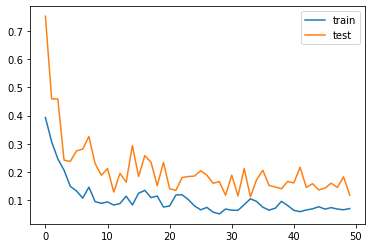

In [62]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(7))
model.compile(loss='mae', optimizer='adam')
history = model.fit(X_train, y_train, epochs=50, batch_size=25, validation_data=(X_test, y_test), verbose=2, shuffle=False)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [83]:
from math import sqrt
from sklearn.metrics import mean_squared_error
pred = model.predict(X_test)
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1]))

scaler = scalers['scaler_actuals.cases']
pred = scaler.inverse_transform(pred)
y_test_scaled = scaler.inverse_transform(y_test)

rmse = sqrt(mean_squared_error(y_test_scaled, pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 77173.816
